Utilizaremos un dataset que pertenece a una empresa de automóviles que tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5).

Después de una intensa investigación de mercado, han deducido que el comportamiento del nuevo mercado es similar al mercado existente.

En su mercado existente, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D).

https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
10691,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
10692,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
10693,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [7]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...,...
10689,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
10691,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
10692,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
10693,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [9]:
gender_unique = pd.unique(df['Gender'])
gender_unique

array(['Female', 'Male'], dtype=object)

In [10]:
# Female = 0
# Male = 1
def convertirGender(gender):
  if gender == 'Male':
    return 1
  return 0

print(convertirGender('Male'), convertirGender('Female'))

1 0


In [11]:
df['Gender'] = df['Gender'].map(convertirGender)

In [12]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,1,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,1,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,1,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,1,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D


In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
columns = ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
enc = OrdinalEncoder()
enc.fit(df[columns])

OrdinalEncoder()

In [15]:
df_encoder = enc.transform(df[columns])
df_encoder

array([[1., 1., 2., 2., 5.],
       [1., 1., 5., 0., 5.],
       [1., 0., 4., 1., 5.],
       ...,
       [0., 1., 5., 2., 5.],
       [0., 1., 5., 2., 5.],
       [1., 1., 4., 0., 3.]])

In [18]:
for (index, name) in enumerate(enc.feature_names_in_):
  print(name)
  print(enc.categories_[index])
  print('--')

Ever_Married
['No' 'Yes']
--
Graduated
['No' 'Yes']
--
Profession
['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing']
--
Spending_Score
['Average' 'High' 'Low']
--
Var_1
['Cat_1' 'Cat_2' 'Cat_3' 'Cat_4' 'Cat_5' 'Cat_6' 'Cat_7']
--


In [21]:
enc.inverse_transform([[0, 1, 1, 2, 6]])

array([['No', 'Yes', 'Doctor', 'Low', 'Cat_7']], dtype=object)

In [22]:
for (index, column) in enumerate(columns):
  df[column] = df_encoder[:, index]

In [23]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,1.0,36,1.0,2.0,0.0,2.0,1.0,5.0,B
1,458994,1,1.0,37,1.0,5.0,8.0,0.0,4.0,5.0,A
3,459000,1,1.0,59,0.0,4.0,11.0,1.0,2.0,5.0,B
5,459003,1,1.0,47,1.0,1.0,0.0,1.0,5.0,3.0,C
6,459005,1,1.0,61,1.0,1.0,5.0,2.0,3.0,5.0,D


In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
y = le.fit_transform(df['Segmentation'])
y

array([1, 0, 1, ..., 3, 1, 1])

In [27]:
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [28]:
columns = list(df.columns)
columns.remove('ID')
columns.remove('Segmentation')
columns

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1']

In [41]:
X = df[columns]
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1.0,36,1.0,2.0,0.0,2.0,1.0,5.0
1,1,1.0,37,1.0,5.0,8.0,0.0,4.0,5.0
3,1,1.0,59,0.0,4.0,11.0,1.0,2.0,5.0
5,1,1.0,47,1.0,1.0,0.0,1.0,5.0,3.0
6,1,1.0,61,1.0,1.0,5.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...
10689,1,1.0,41,1.0,0.0,0.0,1.0,5.0,5.0
10691,1,0.0,35,0.0,4.0,3.0,2.0,4.0,3.0
10692,0,0.0,33,1.0,5.0,1.0,2.0,1.0,5.0
10693,0,0.0,27,1.0,5.0,1.0,2.0,4.0,5.0


# Normalizacion

In [30]:
import matplotlib.pyplot as plt

In [35]:
def monstrar_distribucion(df):
  plt.figure()
  for column in df.columns:
    plt.hist(df[column], alpha=0.5, label=column)
  plt.legend()
  plt.show()

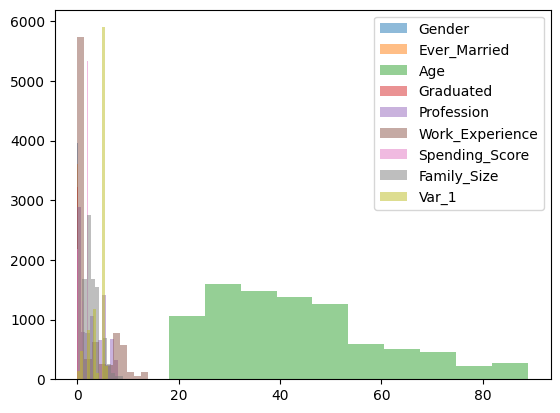

In [36]:
monstrar_distribucion(X)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

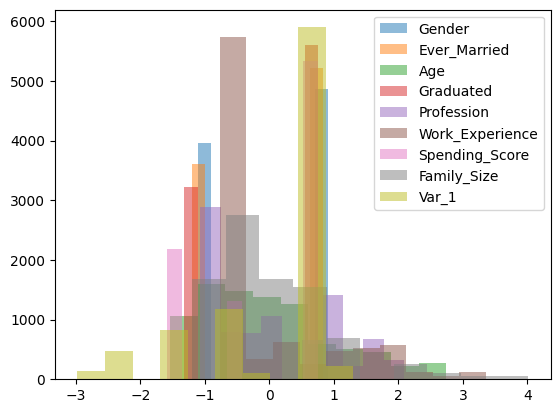

In [40]:
X = pd.DataFrame(X, columns=columns)
monstrar_distribucion(X)

In [42]:
from sklearn.preprocessing import MinMaxScaler

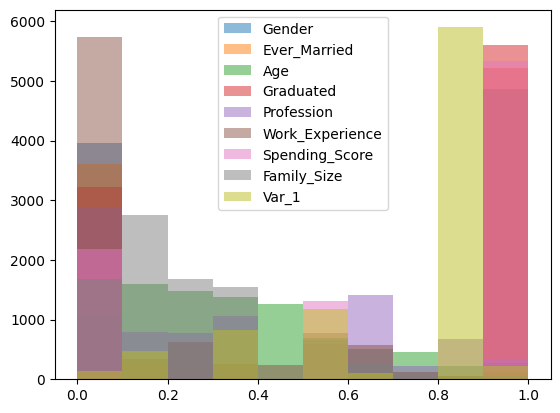

In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
monstrar_distribucion(X)